In here we will try to find out what causes fatalities.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
air=pd.read_csv('AviationData.csv', encoding='ISO-8859-1')

In [3]:
air.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.Flight          object
Air.Carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.of.Flight      object
Report.Status 

In [4]:
air

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84257,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,16/04/1980
84258,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,12/09/2000
84259,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,26/02/2007
84260,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,19/09/1996


In [5]:
airfiltered=air[(air["Investigation.Type"]=="Accident")]

In [6]:
airfiltered

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
5,20191228X23853,Accident,CEN20MA044,2019-12-28,"LAFAYETTE, LA",United States,30.176111,-92.007500,LFT,Lafayette Regional Apt,...,Executive/Corporate,NaN,5.0,2.0,2.0,NaN,IMC,TAKEOFF,Preliminary,06/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84257,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,16/04/1980
84258,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,12/09/2000
84259,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,26/02/2007
84260,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,19/09/1996


Here we will compare fatal injuries to  weather condition.

In [7]:
air2=pd.DataFrame(airfiltered[['Total.Fatal.Injuries','Weather.Condition']])
air2

,Total.Fatal.Injuries,Weather.Condition
0,NaN,VMC
1,2.0,VMC
2,NaN,NaN
3,NaN,NaN
5,5.0,IMC
...,...,...
84257,1.0,VMC
84258,2.0,IMC
84259,3.0,IMC
84260,4.0,UNK


In [8]:
air2=air2.dropna(how='any',axis=0)
air2.groupby("Weather.Condition").mean()

,Total.Fatal.Injuries
Weather.Condition,
IMC,2.369919
UNK,3.273058
VMC,0.514621


In [9]:
air2.groupby("Weather.Condition").std()

,Total.Fatal.Injuries
Weather.Condition,
IMC,10.312467
UNK,16.018351
VMC,3.271101


From the mean and standard deviation, we can assume that flying during VMC results in the lowest number of deaths. However, if we plot it on a graph,

In [10]:
jointDF2 = pd.concat([air2['Total.Fatal.Injuries'], air2['Weather.Condition'].reindex(index=air2['Total.Fatal.Injuries'].index)], sort = False, axis = 1)

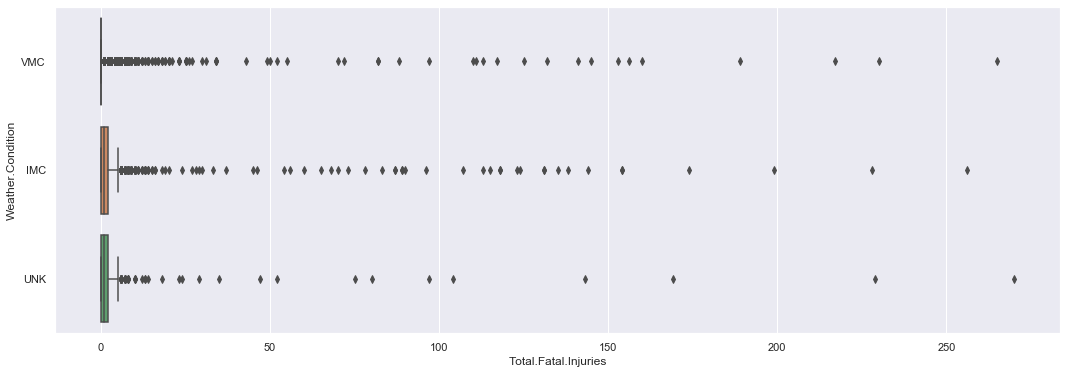

In [11]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x="Total.Fatal.Injuries", y="Weather.Condition",data = jointDF2, orient = "h")

A large spread of anomalies arise for all of the weather conditions. Retrial with a upper limit:

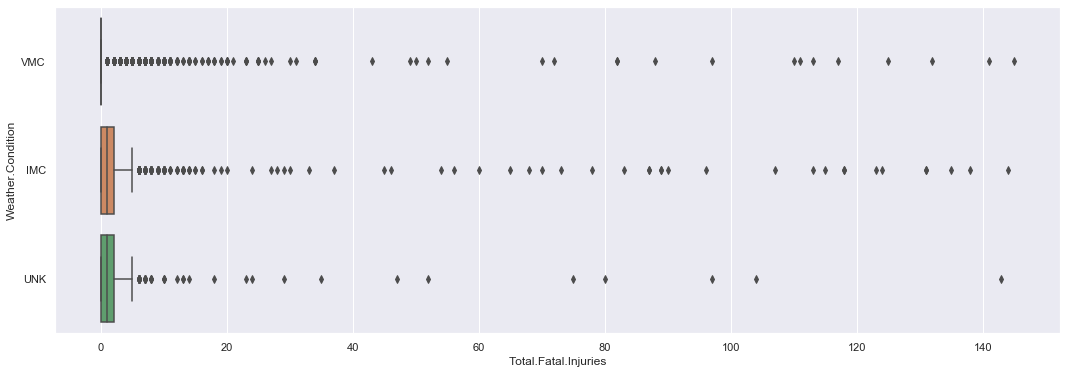

In [20]:
air2a=air2[(air2["Total.Fatal.Injuries"]<150)]
jointDF2 = pd.concat([air2a['Total.Fatal.Injuries'], air2a['Weather.Condition'].reindex(index=air2a['Total.Fatal.Injuries'].index)], sort = False, axis = 1)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x="Total.Fatal.Injuries", y="Weather.Condition",data = jointDF2, orient = "h")

In [13]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth = 2)

In [14]:
tfi_train=pd.DataFrame((air2["Total.Fatal.Injuries"])[:40000])
tfi_test=pd.DataFrame((air2["Total.Fatal.Injuries"])[-14236:])
wc_train=pd.DataFrame((air2["Weather.Condition"])[:40000])
wc_test=pd.DataFrame((air2["Weather.Condition"])[-14236:])

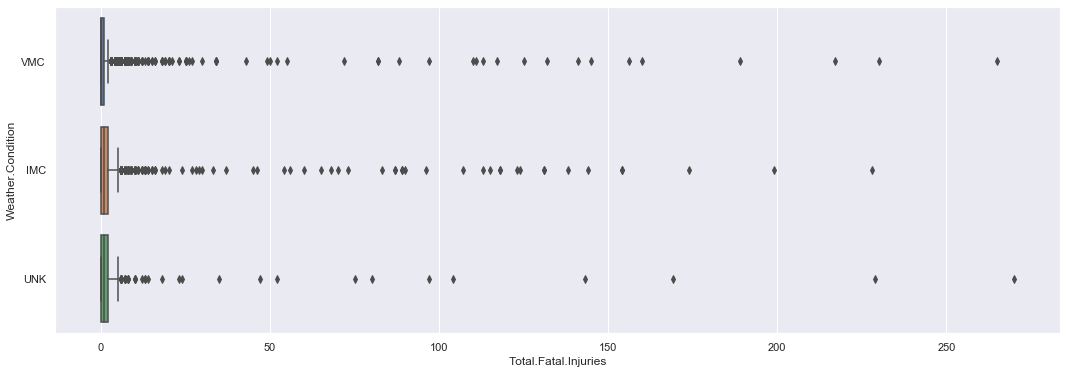

In [15]:
jointDF3 = pd.concat([tfi_train, wc_train.reindex(index=tfi_train.index)], sort = False, axis = 1)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "Total.Fatal.Injuries", y = "Weather.Condition", data = jointDF3, orient = "h")

In [16]:
dectree.fit(tfi_train, wc_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Classification Accuracy 	: 0.8925


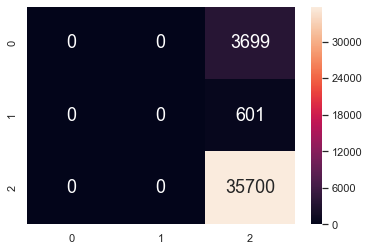

In [18]:
# Predict Legendary corresponding to Total Train
wc_train_pred = dectree.predict(tfi_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(tfi_train, wc_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(wc_train, wc_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Due to the large spread of anomalies, the heatmap incorrectly guesses that the weather condition of all the data is the same.
This comes about due to the spread of the data.
It should hence be noted that even though the weather condition affects the number of fatalities, many other factors also affect the number of fatalities.

Next, we will compare Broad.Phase.of.Flight against No.of.Fatal.Injuries.

In [19]:
air3=pd.DataFrame(airfiltered[['Total.Fatal.Injuries','Broad.Phase.of.Flight']])
air3

,Total.Fatal.Injuries,Broad.Phase.of.Flight
0,NaN,TAKEOFF
1,2.0,TAKEOFF
2,NaN,NaN
3,NaN,NaN
5,5.0,TAKEOFF
6,1.0,APPROACH
7,NaN,CRUISE
9,NaN,NaN
10,1.0,APPROACH
11,NaN,NaN


In [20]:
air3=air3.dropna(how='any',axis=0)

In [21]:
air3.groupby("Broad.Phase.of.Flight").mean()

,Total.Fatal.Injuries
Broad.Phase.of.Flight,
APPROACH,0.815176
CLIMB,1.146384
CRUISE,0.800612
DESCENT,0.783951
GO-AROUND,0.715702
LANDING,0.056050
MANEUVERING,0.845858
OTHER,1.035714
STANDING,0.287554


In [22]:
air3.groupby("Broad.Phase.of.Flight").std()

,Total.Fatal.Injuries
Broad.Phase.of.Flight,
APPROACH,4.282943
CLIMB,6.638504
CRUISE,3.437958
DESCENT,4.393857
GO-AROUND,2.603713
LANDING,0.502990
MANEUVERING,1.384676
OTHER,1.627071
STANDING,1.401596


In [23]:
jointDF3 = pd.concat([air3['Total.Fatal.Injuries'], air3['Broad.Phase.of.Flight'].reindex(index=air3['Total.Fatal.Injuries'].index)], sort = False, axis = 1)

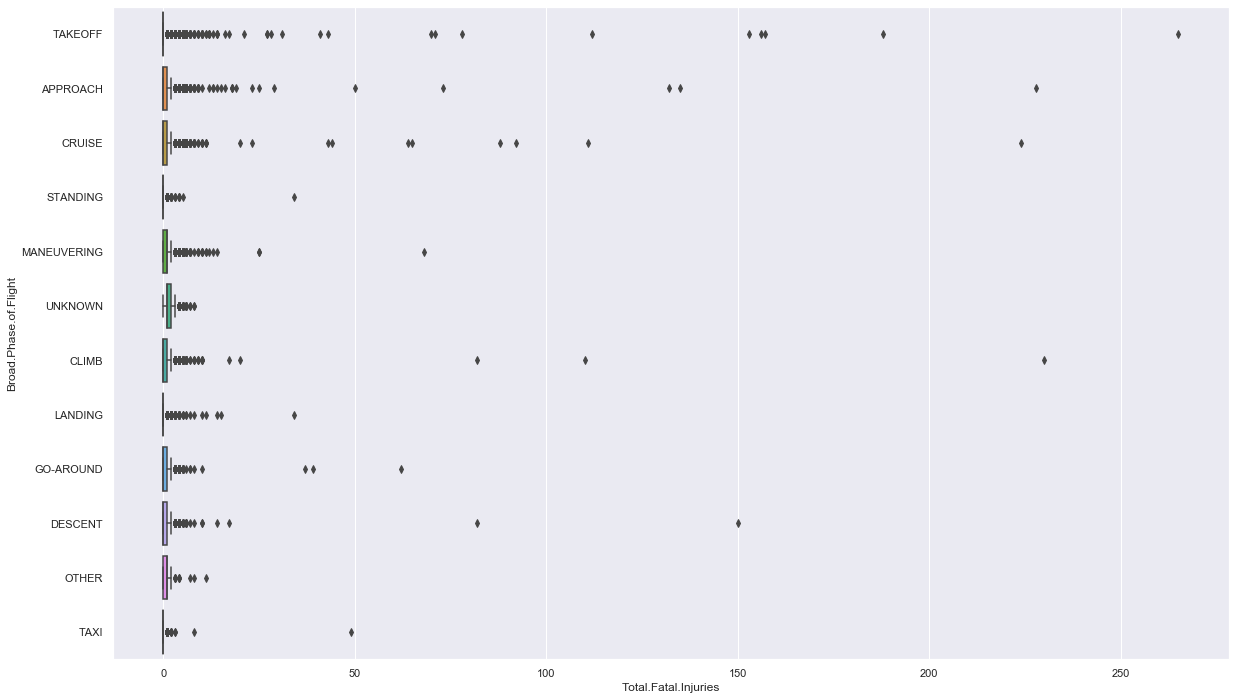

In [24]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x="Total.Fatal.Injuries", y="Broad.Phase.of.Flight",data = jointDF3, orient = "h")

This implies the phase of flight has little impact on number of deaths.
Instead, let us try to analyse Total Fatal Injuries using both phase of flight and weather condition.

In [25]:
air4=pd.DataFrame(airfiltered[['Total.Fatal.Injuries','Broad.Phase.of.Flight','Weather.Condition']])

In [26]:
air4=air4.dropna(how='any',axis=0)

In [27]:
air4

,Total.Fatal.Injuries,Broad.Phase.of.Flight,Weather.Condition
1,2.0,TAKEOFF,VMC
5,5.0,TAKEOFF,IMC
6,1.0,APPROACH,VMC
23,1.0,TAKEOFF,VMC
27,2.0,CRUISE,VMC
36,3.0,APPROACH,VMC
38,9.0,TAKEOFF,IMC
46,1.0,TAKEOFF,VMC
51,2.0,TAKEOFF,VMC
53,1.0,TAKEOFF,IMC


In [28]:
airgroup=air4.groupby(["Weather.Condition","Broad.Phase.of.Flight"])

In [29]:
airgroup.mean()

Total.Fatal.Injuries
Weather.Condition Broad.Phase.of.Flight                      
IMC               APPROACH                           2.071726
                  CLIMB                              1.857143
                  CRUISE                             1.538560
                  DESCENT                            1.417062
                  GO-AROUND                          1.899441
                  LANDING                            0.245902
                  MANEUVERING                        1.622047
                  OTHER                              1.000000
                  STANDING                           0.647059
                  TAKEOFF                            1.614865
                  TAXI                               0.282051
                  UNKNOWN                            1.557377
UNK               APPROACH                           1.525000
                  CLIMB                              1.454545
                  CRUISE                             1.824074
                  DESCENT                            1.368421
                  GO-AROUND                          0.250000
                  LANDING                            0.153846
                  MANEUVERING                        1.410256
                  OTHER                              0.500000
                  STANDING                           0.000000
                  TAKEOFF                            0.860465
                  TAXI                               0.000000
                  UNKNOWN                            1.800000
VMC               APPROACH                           0.540727
                  CLIMB                              1.000000
                  CRUISE                             0.507501
                  DESCENT                            0.566787
                  GO-AROUND                          0.399015
                  LANDING                            0.047830
                  MANEUVERING                        0.772413
                  OTHER                              0.919192
                  STANDING                           0.279522
                  TAKEOFF                            0.459323
                  TAXI                               0.071482
                  UNKNOWN                            1.407494

In [30]:
airgroup.std()

Total.Fatal.Injuries
Weather.Condition Broad.Phase.of.Flight                      
IMC               APPROACH                           9.043314
                  CLIMB                              1.720653
                  CRUISE                             1.526951
                  DESCENT                            1.611415
                  GO-AROUND                          3.077820
                  LANDING                            1.201092
                  MANEUVERING                        3.259770
                  OTHER                              1.000000
                  STANDING                           1.221739
                  TAKEOFF                            4.313646
                  TAXI                               1.316869
                  UNKNOWN                            0.992045
UNK               APPROACH                           1.825566
                  CLIMB                              1.184313
                  CRUISE                             1.439177
                  DESCENT                            1.065130
                  GO-AROUND                          0.500000
                  LANDING                            0.414663
                  MANEUVERING                        1.323473
                  OTHER                              0.707107
                  STANDING                           0.000000
                  TAKEOFF                            1.390125
                  TAXI                               0.000000
                  UNKNOWN                            1.534012
VMC               APPROACH                           2.335593
                  CLIMB                              7.261471
                  CRUISE                             2.073898
                  DESCENT                            2.441819
                  GO-AROUND                          0.944933
                  LANDING                            0.464012
                  MANEUVERING                        1.117616
                  OTHER                              1.626796
                  STANDING                           1.417771
                  TAKEOFF                            3.621832
                  TAXI                               1.354228
                  UNKNOWN                            1.103873

In [31]:
airgroup.count()

Total.Fatal.Injuries
Weather.Condition Broad.Phase.of.Flight                      
IMC               APPROACH                                962
                  CLIMB                                   266
                  CRUISE                                 1569
                  DESCENT                                 211
                  GO-AROUND                               179
                  LANDING                                 305
                  MANEUVERING                             508
                  OTHER                                     3
                  STANDING                                 17
                  TAKEOFF                                 444
                  TAXI                                     39
                  UNKNOWN                                  61
UNK               APPROACH                                 40
                  CLIMB                                    22
                  CRUISE                                  216
                  DESCENT                                  19
                  GO-AROUND                                 4
                  LANDING                                  52
                  MANEUVERING                              78
                  OTHER                                     2
                  STANDING                                 10
                  TAKEOFF                                  43
                  TAXI                                      5
                  UNKNOWN                                  95
VMC               APPROACH                               4788
                  CLIMB                                  1403
                  CRUISE                                 6932
                  DESCENT                                1385
                  GO-AROUND                              1015
                  LANDING                               11311
                  MANEUVERING                            7373
                  OTHER                                    99
                  STANDING                                669
                  TAKEOFF                               10276
                  TAXI                                   1343
                  UNKNOWN                                 427

Since we have already noted that VMC has a low mean number of fatalities, let us ignore mean of VMC.
From the above mean, we can guess that the likelihood of fatalities increase during Approach, Cruise and Maneuvering.
Let us now plot no. of fatalities against phase of flight without VMC weather.

In [32]:
air5=air4[(air4["Weather.Condition"]!="VMC")]

In [33]:
air5

,Total.Fatal.Injuries,Broad.Phase.of.Flight,Weather.Condition
5,5.0,TAKEOFF,IMC
38,9.0,TAKEOFF,IMC
53,1.0,TAKEOFF,IMC
121,2.0,TAKEOFF,IMC
124,1.0,APPROACH,IMC
215,1.0,UNKNOWN,IMC
227,1.0,CRUISE,IMC
241,5.0,APPROACH,IMC
466,1.0,CRUISE,IMC
494,2.0,CRUISE,UNK


In [34]:
jointDF4 = pd.concat([air5['Total.Fatal.Injuries'], air5['Broad.Phase.of.Flight'].reindex(index=air5['Total.Fatal.Injuries'].index)], sort = False, axis = 1)

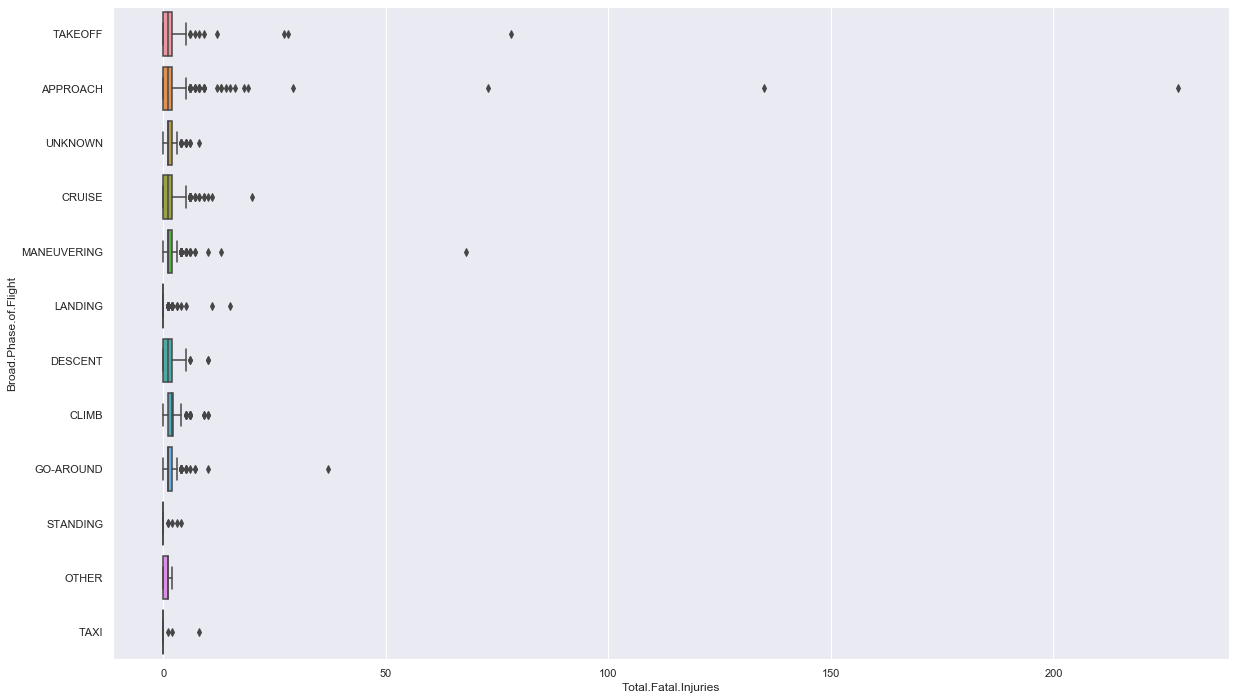

In [35]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x="Total.Fatal.Injuries", y="Broad.Phase.of.Flight",data = jointDF4, orient = "h")

Here the distribution of deaths is much more distinct, and it is from here we can guess that chance of fatality is likely to occur during Maneurering, Go-Around, and Climb, based on the distribution of the quardrants.

Let us now plot for IMC and VMC seperately.

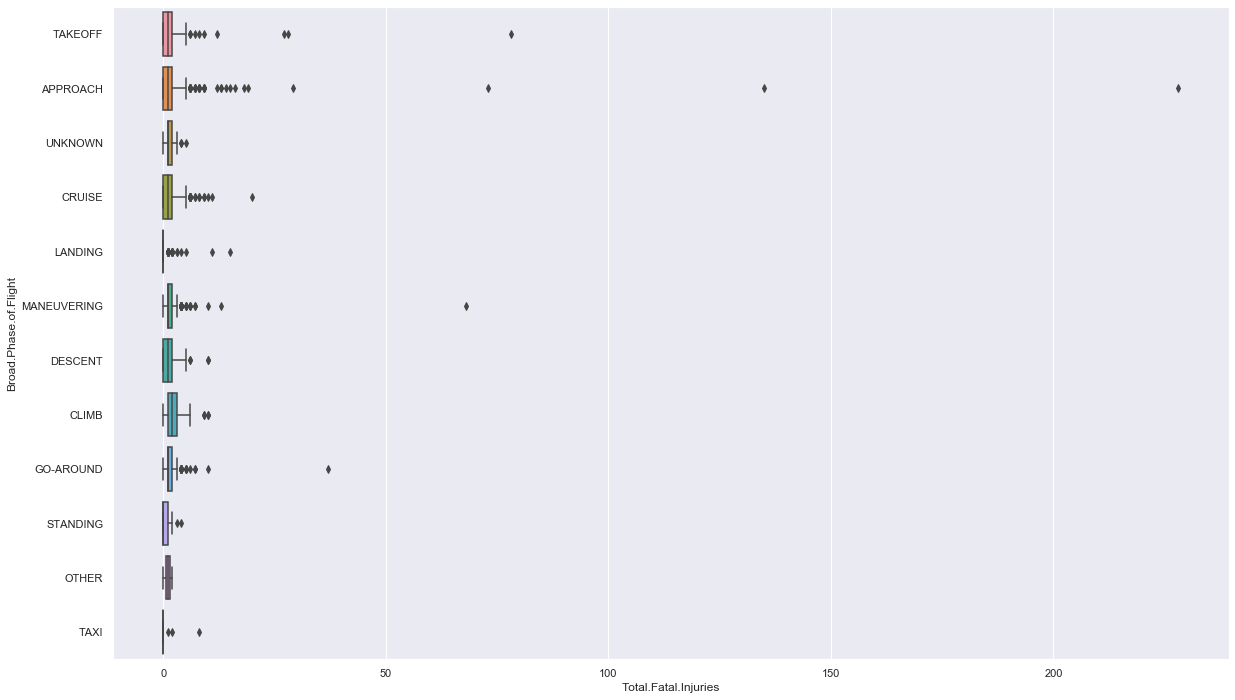

In [36]:
air5=air4[(air4["Weather.Condition"]=="IMC")]
jointDF4 = pd.concat([air5['Total.Fatal.Injuries'], air5['Broad.Phase.of.Flight'].reindex(index=air5['Total.Fatal.Injuries'].index)], sort = False, axis = 1)
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x="Total.Fatal.Injuries", y="Broad.Phase.of.Flight",data = jointDF4, orient = "h")

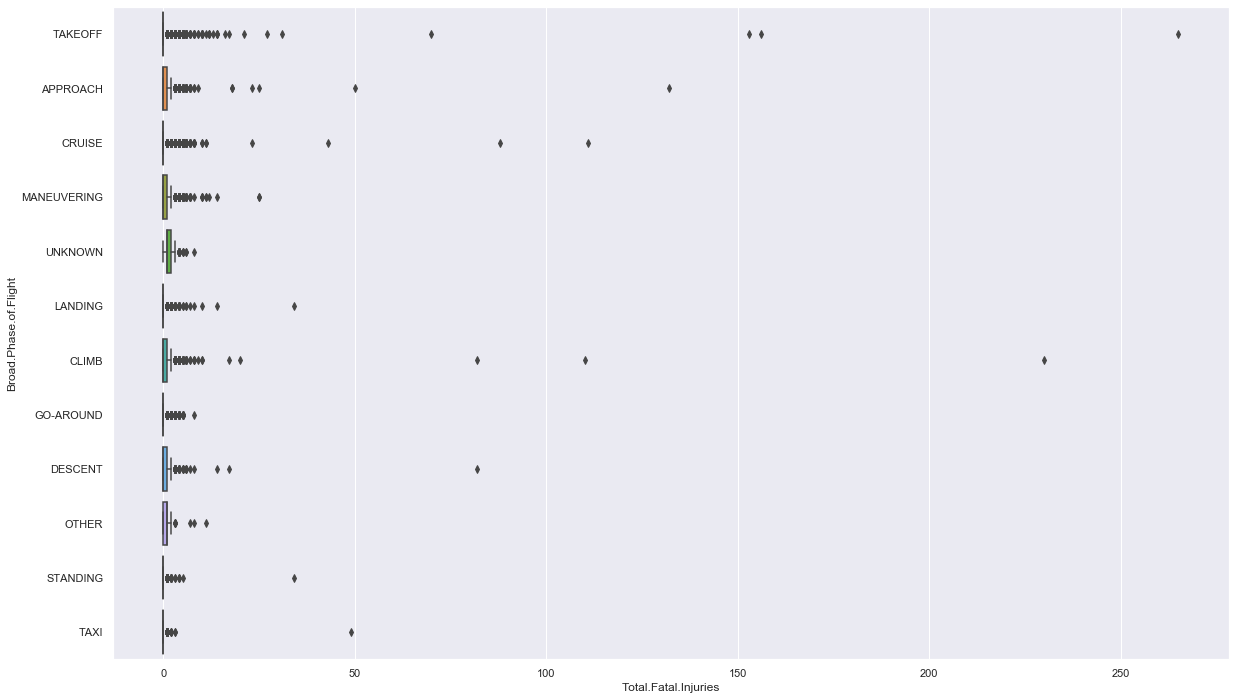

In [37]:
air5=air4[(air4["Weather.Condition"]=="VMC")]
jointDF4 = pd.concat([air5['Total.Fatal.Injuries'], air5['Broad.Phase.of.Flight'].reindex(index=air5['Total.Fatal.Injuries'].index)], sort = False, axis = 1)
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x="Total.Fatal.Injuries", y="Broad.Phase.of.Flight",data = jointDF4, orient = "h")

Note the unusual distribution of deaths for takeoff during VMC. Even though the mean is close to zero, anomlies are distributed around 10 to 40 deaths, with some greater than 100.

A quick investigation:

In [38]:
airinv=airfiltered[(airfiltered["Weather.Condition"]=="VMC")]
airinv=airinv[(airinv["Broad.Phase.of.Flight"]=="TAKEOFF")]
airinv=airinv[(airinv["Total.Fatal.Injuries"]>=10)]

In [39]:
airinv

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
747,20190630X33829,Accident,CEN19MA190,2019-06-30,"Addison, TX",United States,32.966111,-96.832778,ADS,Addison Airport,...,Business,NaN,10.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/07/2019
806,20190622X23034,Accident,WPR19MA177,2019-06-21,"Mokuleia, HI",United States,21.580556,-158.188333,HDH,Dillingham Airfield,...,Skydiving,NaN,11.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/07/2019
6581,20151020X73414,Accident,ERA16RA021,2015-10-18,"Bogota, Colombia",Colombia,4.681667,-74.105556,SKBO,Eldorado Airport,...,Personal,NaN,10.0,8.0,NaN,NaN,VMC,TAKEOFF,Foreign,NaN
7683,20150320X15605,Accident,ERA15RA163,2015-03-19,"Punta del Este, Uruguay",Uruguay,-34.855278,-55.094166,SULS,Cpt Corbeta CA Curbelo Intl,...,NaN,NaN,10.0,NaN,NaN,NaN,VMC,TAKEOFF,Foreign,NaN
10240,20130707X14623,Accident,DCA13MA121,2013-07-07,"Soldotna, AK",United States,60.475278,-151.043611,PASX,Soldotna Airport,...,NaN,REDISKE FAMILY LIMITED PARTNERSHIP (DBA: REDIS...,10.0,NaN,NaN,NaN,VMC,TAKEOFF,Probable Cause,16/12/2015
19015,20080904X01375,Accident,LAX08MA277,2008-08-22,"Moab, UT",United States,38.729723,-109.766111,CNY,Canyonlands Field Airport,...,Executive/Corporate,NaN,10.0,NaN,NaN,NaN,VMC,TAKEOFF,Probable Cause,24/09/2014
30253,20030110X00049,Accident,DCA03MA022,2003-01-08,"Charlotte, NC",United States,NaN,NaN,CLT,Charlotte-Douglas Internationa,...,NaN,AIR MIDWEST INC (DBA: US Airways Express),21.0,NaN,1.0,NaN,VMC,TAKEOFF,Probable Cause,29/06/2004
32493,20011130X02321,Accident,DCA02MA001,2001-11-12,"Belle Harbor, NY",United States,NaN,NaN,JFK,John F. Kennedy International,...,NaN,NaN,265.0,NaN,NaN,NaN,VMC,TAKEOFF,Probable Cause,14/04/2005
37528,20001212X19228,Accident,CHI99MA269,1999-07-31,"MARINE CITY, MI",United States,NaN,NaN,76G,MARINE CITY AIRPORT,...,Skydiving,NaN,10.0,NaN,NaN,NaN,VMC,TAKEOFF,Probable Cause,17/10/2016
43351,20001208X07015,Accident,DCA97MA009B,1996-11-19,"QUINCY, IL",United States,NaN,NaN,UIN,QUINCY MUNICIPAL,...,Business,NaN,14.0,0.0,0.0,0.0,VMC,TAKEOFF,Probable Cause,31/03/1998


Very few of these flights are personal. Let us compare Purpose.of.Flight with fatalities:

In [52]:
air6=pd.DataFrame(airfiltered[['Total.Fatal.Injuries','Purpose.of.Flight']])
air6=air6[(air6["Purpose.of.Flight"]!='Unknown')]
air6=air6.dropna(how='any',axis=0)

In [56]:
air6.groupby(["Purpose.of.Flight"]).count()
air6.groupby(["Purpose.of.Flight"]).mean()

,Total.Fatal.Injuries
Purpose.of.Flight,
Aerial Application,3270
Aerial Observation,488
Air Drop,3
Air Race/Show,74
Banner Tow,16
Business,3186
Executive/Corporate,387
External Load,27
Ferry,648


In [57]:
air6.groupby(["Purpose.of.Flight"]).mean()

,Total.Fatal.Injuries
Purpose.of.Flight,
Aerial Application,0.158410
Aerial Observation,0.795082
Air Drop,1.333333
Air Race/Show,1.189189
Banner Tow,1.125000
Business,0.723478
Executive/Corporate,1.219638
External Load,1.037037
Ferry,0.365741


In [53]:
air6=air6[(air6["Total.Fatal.Injuries"]<40)]
jointDF6 = pd.concat([air6['Total.Fatal.Injuries'], air6['Purpose.of.Flight'].reindex(index=air2['Total.Fatal.Injuries'].index)], sort = False, axis = 1)

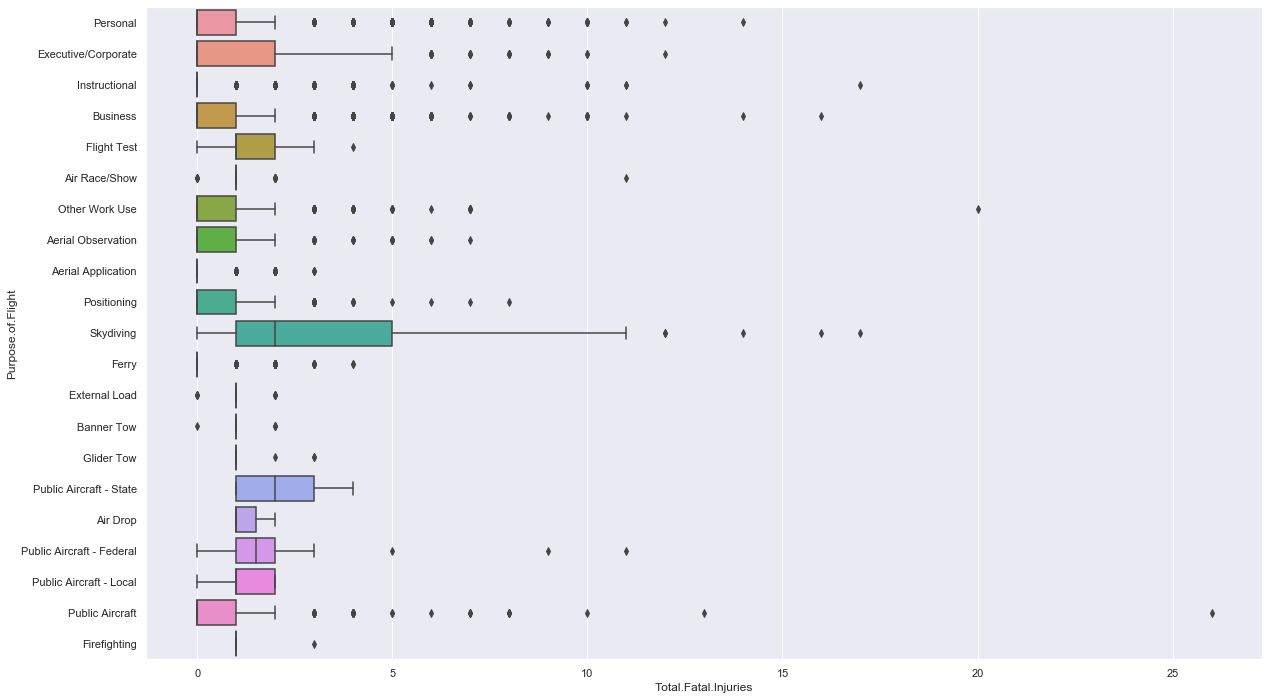

In [54]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.boxplot(x="Total.Fatal.Injuries", y="Purpose.of.Flight",data = jointDF6, orient = "h")

In [1]:
air7=pd.DataFrame(airfiltered[['Total.Fatal.Injuries','Engine.Type']])
air7=air7.dropna(how='any',axis=0)

NameError: name 'pd' is not defined